In [1]:
import os
from os.path import join as pj
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

### --- compare accuracy per size ---

In [2]:
det_each_size_df = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_20200806/each_size_df.csv')
det_each_size_df["order"] = det_each_size_df["Insect_size"].apply(lambda x: np.floor(np.log2(x)))
insect_size = np.asarray(det_each_size_df["order"])
idx, count = np.unique(insect_size, return_counts=True)
insect_size_df = pd.DataFrame({"order": idx, "count": count})

In [3]:
refinedet = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512/accuracy_distribution_of_size.csv')
refinedet_20200806 = pd.read_csv('/home/tanida/workspace/Insect_Phenology_Detector/figure/detection/RefineDet/crop_b2_2_4_8_16_32_im512_20200806/all_size_df.csv')

In [4]:
insect_size_df

,order,count
0,7.0,15
1,8.0,181
2,9.0,189
3,10.0,84
4,11.0,50
5,12.0,38
6,13.0,47
7,14.0,16
8,15.0,3


In [5]:
all_df = refinedet
all_df = all_df.rename(columns={'Accuracy': 'refinedet'})
all_df = all_df.assign(refinedet_20200806=refinedet_20200806["Accuracy"])
all_df = all_df.assign(count=insect_size_df["count"])
all_df

,order,refinedet,Insect_size,order.1,refinedet_20200806,count
0,7.0,0.933333,224.800000,7.0,0.533333,15
1,8.0,1.000000,394.436464,8.0,0.690608,181
2,9.0,0.994709,726.137566,9.0,0.550265,189
3,10.0,0.988095,1420.392857,10.0,0.654762,84
4,11.0,0.980000,2870.260000,11.0,0.760000,50
5,12.0,0.973684,6288.526316,12.0,0.736842,38
6,13.0,0.957447,11189.978723,13.0,0.744681,47
7,14.0,1.000000,22611.437500,14.0,0.562500,16
8,15.0,1.000000,37326.666667,15.0,0.666667,3


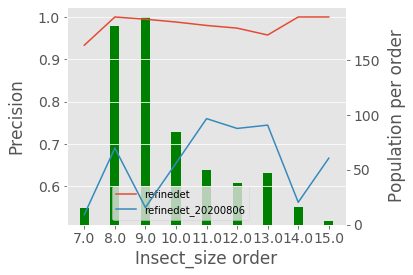

In [6]:
plt.rcParams["font.size"] = 14
fig, ax1 = plt.subplots(figsize=(5,4))
ax2 = ax1.twinx()

x_label = ["7.0", "8.0", "9.0", "10.0", "11.0", "12.0", "13.0", "14.0", "15.0"]

ax1.bar(x_label, all_df["count"], width=0.3, color="g")
ax2.plot(x_label, all_df["refinedet"], label="refinedet")
ax2.plot(x_label, all_df["refinedet_20200806"], label="refinedet_20200806")
ax1.yaxis.tick_right()
ax2.yaxis.tick_left()

h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h2, l2, bbox_to_anchor=(0.67, 0.), loc='lower right', fontsize=10)

ax1.set_xlabel("Insect_size order")
ax1.set_ylabel("Precision")
ax1.yaxis.set_label_coords(-0.15, 0.5)
ax1.grid(False)
ax2.set_ylabel("Population per order")
ax2.yaxis.set_label_coords(1.15, 0.5)
plt.savefig("/home/tanida/workspace/Insect_Phenology_Detector/result/detection/compare_add_data/compare_accuracy_per_size.png", bbox_inches="tight")